In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split

  province city  city_code station station_code level  index pollutions
0      重庆市  重庆市     500000     缙云山        1414A     良    NaN  颗粒物(PM10)
1      重庆市  重庆市     500000     缙云山        1414A     良    NaN  颗粒物(PM10)
2      重庆市  重庆市     500000     缙云山        1414A     良    NaN  颗粒物(PM10)
3      重庆市  重庆市     500000     缙云山        1414A     良    NaN  颗粒物(PM10)
4      重庆市  重庆市     500000     缙云山        1414A     良    NaN  颗粒物(PM10)


In [25]:
data=pd.read_csv('result.csv',index_col=0,encoding='utf-8')
data=data.sort_values(by="pubtime",ascending=True)
data.pop("level")
data.pop("pollutions")
print (data.head())
print (data.shape)
index=data.index
col=data.columns
class_names=np.unique(data.ix[:,-1])
#print (type(data))
print (class_names)
#print (data.describe())

        aqi   so2    no2     co    o3   o3_8h   pm10  pm2_5  \
7254   97.0  29.0  101.0  1.383   0.0  31.375  143.0   65.0   
7350   71.0  18.0   52.0  0.965   4.0  79.500   91.0   51.0   
7230  102.0  14.0   91.0  2.081   4.0  20.750    0.0   76.0   
7062   79.0  24.0   68.0  1.373   8.0  25.125  104.0   58.0   
7206   90.0  30.0   53.0  1.092  45.0  29.875  121.0   67.0   

                  pubtime  
7254  2014-05-01 01:00:00  
7350  2014-05-01 01:00:00  
7230  2014-05-01 01:00:00  
7062  2014-05-01 01:00:00  
7206  2014-05-01 01:00:00  
(11817, 9)
['2014-05-01 01:00:00' '2014-05-01 02:00:00' '2014-05-01 03:00:00'
 '2014-05-01 04:00:00' '2014-05-01 05:00:00' '2014-05-01 06:00:00'
 '2014-05-01 07:00:00' '2014-05-01 08:00:00' '2014-05-01 09:00:00'
 '2014-05-01 10:00:00' '2014-05-01 11:00:00' '2014-05-01 12:00:00'
 '2014-05-01 13:00:00' '2014-05-01 14:00:00' '2014-05-01 15:00:00'
 '2014-05-01 16:00:00' '2014-05-01 17:00:00' '2014-05-01 18:00:00'
 '2014-05-01 19:00:00' '2014-05-01 20:00

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [26]:
data_train, data_test= train_test_split(data,test_size=0.1, random_state=0)
print ("训练集统计描述：\n",data_train.describe().round(2))
print ("验证集统计描述：\n",data_test.describe().round(2))
print ("训练集信息：\n",data_train.ix[:,-1].value_counts())
print ("验证集信息：\n",data_test.ix[:,-1].value_counts())

训练集统计描述：
             aqi       so2       no2        co        o3     o3_8h      pm10  \
count  10635.00  10635.00  10635.00  10635.00  10635.00  10635.00  10635.00   
mean      70.37     20.49     35.10      1.01     38.03     38.79     78.13   
std       31.84     14.85     20.15      0.39     42.23     36.55     47.64   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%       52.00     11.00     21.00      0.79      5.00     10.00     47.00   
50%       68.00     17.00     33.00      0.98     23.00     28.00     75.00   
75%       88.00     27.00     47.00      1.21     57.00     57.00    107.00   
max      259.00    219.00    151.00      5.47    267.00    218.00    350.00   

          pm2_5  
count  10635.00  
mean      46.27  
std       25.70  
min        0.00  
25%       29.00  
50%       44.00  
75%       60.00  
max      209.00  
验证集统计描述：
            aqi      so2      no2       co       o3    o3_8h     pm10    pm2_5
count  1182.00  1182.00  118

C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\HASEE\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


In [27]:
import sys
X_train=data_train.iloc[:,0:-2]
X_test=data_test.iloc[:,0:-2]
feature=data_train.iloc[:,0:-2].columns
print (feature)
y_train=data_train.iloc[:,-2]
y_test=data_test.iloc[:,-2]

Index(['aqi', 'so2', 'no2', 'co', 'o3', 'o3_8h', 'pm10'], dtype='object')


Index(['aqi', 'so2', 'no2', 'co', 'o3', 'o3_8h', 'pm10'], dtype='object')


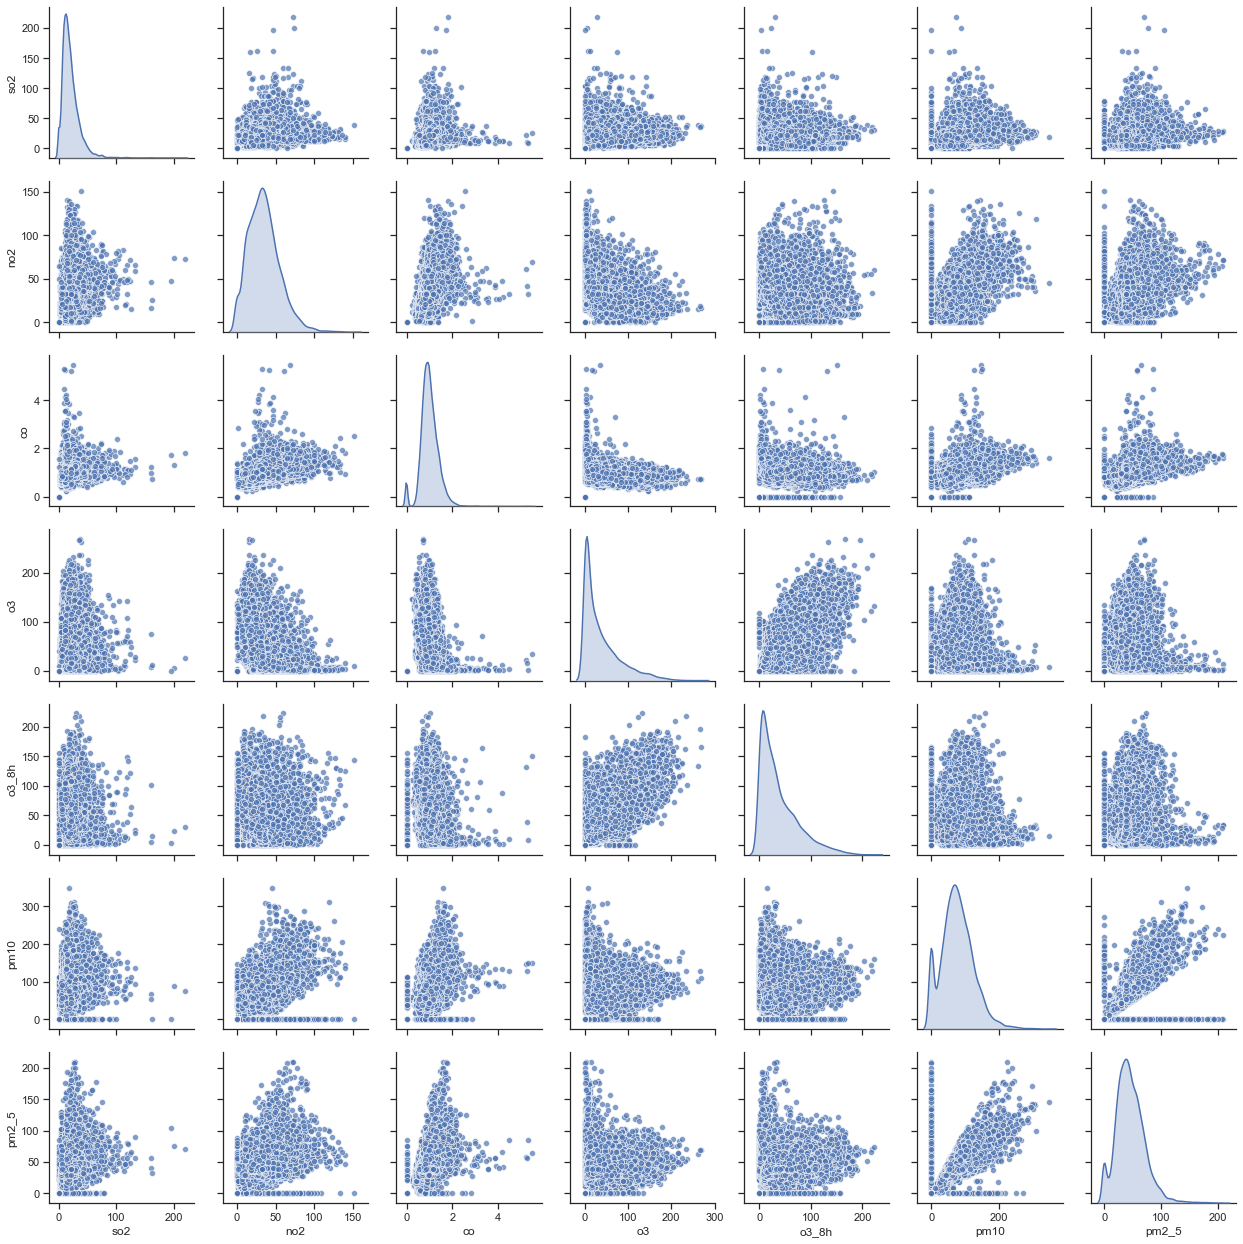

In [28]:
import sys
X_train=data_train.iloc[:,0:-2]
X_test=data_test.iloc[:,0:-2]
feature=data_train.iloc[:,0:-2].columns
print (feature)
y_train=data_train.iloc[:,-2]
y_test=data_test.iloc[:,-2]


import seaborn as sns
sns.set(style="ticks", color_codes=True);
# 创建自定义颜色调色板
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
# 画散点图矩阵
sns.pairplot(data.drop([u'aqi'],axis = 1), diag_kind = 'kde', plot_kws=dict(alpha = 0.7))
plt.show()

In [59]:
X_train

,aqi,so2,no2,co,o3,o3_8h,pm10
708,76.0,32.0,40.0,1.134,18.0,24.0,101.0
1849,51.0,5.0,8.0,0.517,48.0,35.0,52.0
7977,85.0,21.0,27.0,1.014,32.0,18.0,85.0
9499,100.0,26.0,34.0,0.914,138.0,169.0,129.0
10731,73.0,20.0,22.0,0.904,108.0,30.0,94.0
...,...,...,...,...,...,...,...
6463,99.0,36.0,46.0,1.624,8.0,3.0,142.0
2638,158.0,17.0,48.0,1.385,4.0,3.0,238.0
10683,85.0,16.0,40.0,0.898,21.0,43.0,120.0
9942,91.0,20.0,57.0,1.424,2.0,2.0,132.0


In [10]:
from sklearn.model_selection import RandomizedSearchCV
criterion=['mse','mae']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]#stop=2000
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'criterion':criterion,
                'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#构建模型
clf= RandomForestRegressor()
clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
                              n_iter = 3,  
                              cv = 3, verbose=2, random_state=42, n_jobs=-1)
#回归
clf_random.fit(X_train, y_train)
print (clf_random.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  2.8min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  9.1min finished


{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 80, 'criterion': 'mae', 'bootstrap': False}


In [39]:
from pyecharts.charts import Bar
rf=RandomForestRegressor(criterion='mae',bootstrap=False,max_features='auto', max_depth=80,min_samples_split=4, n_estimators=200,min_samples_leaf=4)

rf.fit(X_train, y_train) 
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

#指标重要性
#print (rf.feature_importances_)
#bar=Bar()
#bar.add_xaxis('指标重要性',feature, rf.feature_importances_.round(2),is_label_show=True,label_text_color='#000')
#bar.render('指标重要性.html')

from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
print ("决策树模型评估--训练集：")
print ('训练r^2:',rf.score(X_train,y_train))
print ('均方差',mean_squared_error(y_train,y_train_pred))
print ('绝对差',mean_absolute_error(y_train,y_train_pred))
print ('解释度',explained_variance_score(y_train,y_train_pred))

print ("决策树模型评估--验证集：")
print ('验证r^2:',rf.score(X_test,y_test))
print ('均方差',mean_squared_error(y_test,y_test_pred))
print ('绝对差',mean_absolute_error(y_test,y_test_pred))
print ('解释度',explained_variance_score(y_test,y_test_pred))


决策树模型评估--训练集：
训练r^2: 0.9503188554177194
均方差 32.814013503761174
绝对差 1.8472581100141043
解释度 0.950484723778615
决策树模型评估--验证集：
验证r^2: 0.857358426788541
均方差 81.45411421319797
绝对差 3.819039763113367
解释度 0.8575935114912387


In [ ]:
with open ("重庆市-station_realtime-2014-06.csv",encoding="UTF-8" )as f1:
    df1=pd.read_csv(f1)    
df1.pop("province")
df1.pop("city")
df1.pop("city_code")
df1.pop("station")
df1.pop("station_code")
df1.pop("index")
df1.pop("so2_24h")
df1.pop("no2_24h")
df1.pop("co_24h")
df1.pop("o3_24h")
df1.pop("pm10_24h")
df1.pop("pm2_5_24h")
df1.pop("o3_8h_24h")
df1.pop("level")
df1.pop("pollutions")
df1=df1.sort_values(by="pubtime",ascending=True)
df1.pop("pubtime")
df1 = df1.fillna(0)
df1.to_csv("result2.csv")

In [45]:
'''预测'''
data_pred=pd.read_csv('result2.csv',index_col=0,encoding='gb2312')
data_pred.pop("pubtime")
data_pred.pop("aqi")
index=data_pred.index
y_pred=rf.predict(data_pred.values)

#将预测结果保存到文件中
result_reg=pd.DataFrame(index)
result_reg['AQI']=y_pred*10
result_reg.to_csv('pre_result.csv',encoding='gb2312')
print (result_reg)

           0     AQI
0          0  75.000
1        349  75.000
2        503   0.000
3        726  75.000
4        868  75.000
...      ...     ...
11395   6755  90.000
11396   5252  90.000
11397   6298  67.875
11398   7773  67.875
11399  11399  30.000

[11400 rows x 2 columns]


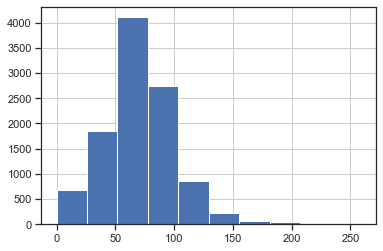

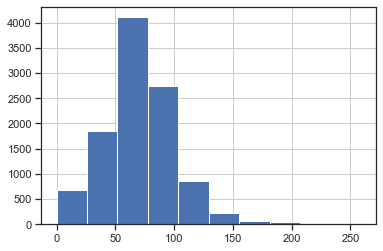

In [48]:
X_train['aqi'].hist().get_figure()

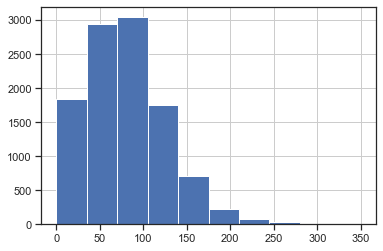

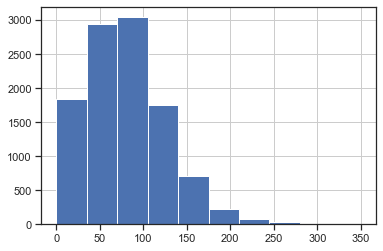

In [51]:
X_train['pm10'].hist().get_figure()

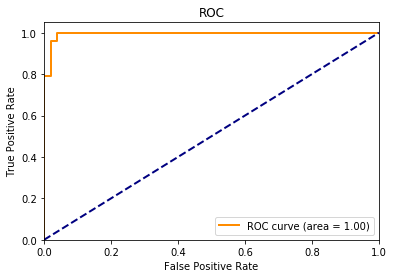

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()